In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [18]:
ExN = pd.read_csv('../extracted_data/ExN_filled.csv', sep = ',', index_col = 0)

R2:  0.20970675908160363
RMSE: 0.038749924810079106


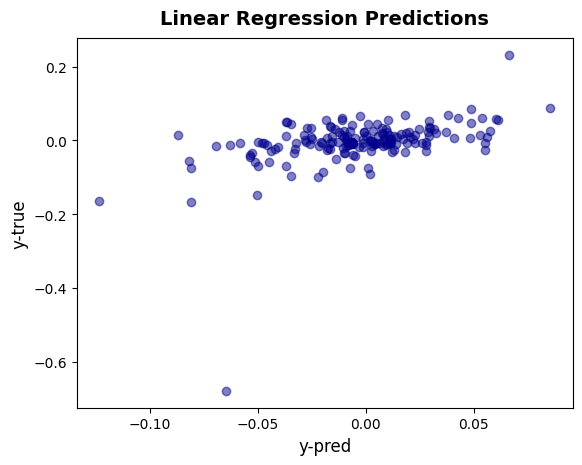

In [19]:
random.seed(38)

target_column = random.choice(ExN.columns)  # Randomly pick a column name

X = ExN.drop(columns=[target_column])  # Features (all columns except the target)
y = ExN[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.6639061224308295


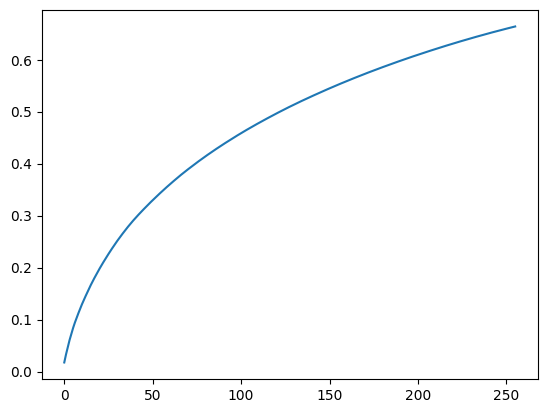

In [20]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [21]:
dims = 256
ExN_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExN_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.000119,-0.000232,-0.269259,-0.000134,-0.000010,0.222574,0.000334,0.000368,-0.000042,1.293952e-04,...,0.033047,0.053816,0.110771,-0.053783,0.009638,0.024045,0.072138,-0.054876,0.049993,-0.111346
1,-0.000133,-0.000272,-0.283812,-0.000199,0.000206,-0.197372,0.000052,0.000009,0.000005,-2.361117e-04,...,-0.025651,-0.010696,0.005393,0.015451,0.034033,-0.078627,0.073738,0.032435,0.060620,-0.069488
2,-0.000151,-0.000320,-0.503548,-0.000242,0.000270,-0.257765,0.000127,0.000259,-0.000030,9.610777e-05,...,-0.093017,0.128805,0.274305,0.156274,-0.081998,-0.095918,-0.021351,-0.003252,0.164416,0.069103
3,-0.045621,0.187416,0.000437,0.106780,0.212415,0.012837,0.321593,-0.039798,0.034416,1.189779e-01,...,-0.007520,0.050974,-0.034622,0.011514,0.026813,0.018066,0.065895,-0.041645,0.082902,0.006703
4,-0.000154,-0.000314,0.241666,-0.000237,0.000101,0.121581,0.000414,0.000503,-0.000053,4.023063e-05,...,-0.010219,0.006436,0.116753,-0.028921,0.021648,0.025755,0.076891,0.024838,-0.102821,0.032999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,-0.000130,-0.000255,-0.039109,-0.000161,-0.000007,0.257856,0.000402,0.000428,-0.000046,4.244004e-05,...,-0.048527,-0.027730,-0.029647,-0.005525,0.040508,-0.048304,0.019157,0.082825,0.048345,-0.046869
2059,-0.000149,-0.000309,-0.107948,-0.000234,0.000191,-0.094006,0.000231,0.000303,-0.000032,3.175104e-07,...,-0.048473,-0.058268,-0.119089,0.045622,0.057390,0.007364,-0.017065,0.087454,0.036180,-0.096080
2060,-0.056390,0.295538,0.000426,-0.260786,-0.123557,0.012592,0.639823,-0.018251,-0.013241,1.338212e-01,...,-0.017752,-0.034083,-0.004543,0.060269,-0.013290,0.034757,-0.026580,-0.122233,0.004283,-0.031079
2061,-0.000146,-0.000295,-0.297320,-0.000187,0.000011,0.279132,0.000501,0.000614,-0.000068,1.985798e-04,...,-0.067470,0.008855,-0.081842,0.084814,0.034960,-0.094337,-0.004060,0.109209,0.050777,-0.058709


R2:  0.14935900407510383
RMSE: 0.0402022060373201


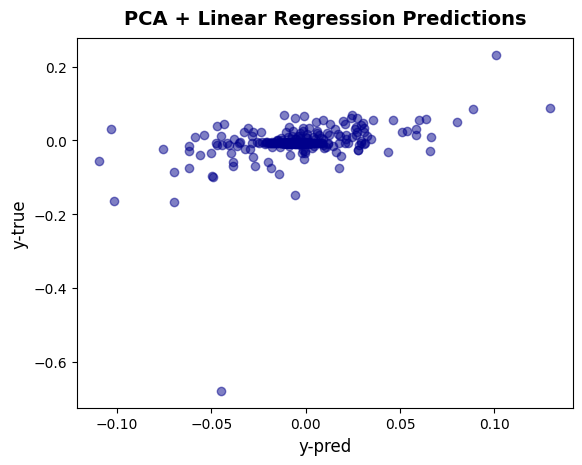

In [22]:
X_train, X_test, y_train, y_test = train_test_split(ExN_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

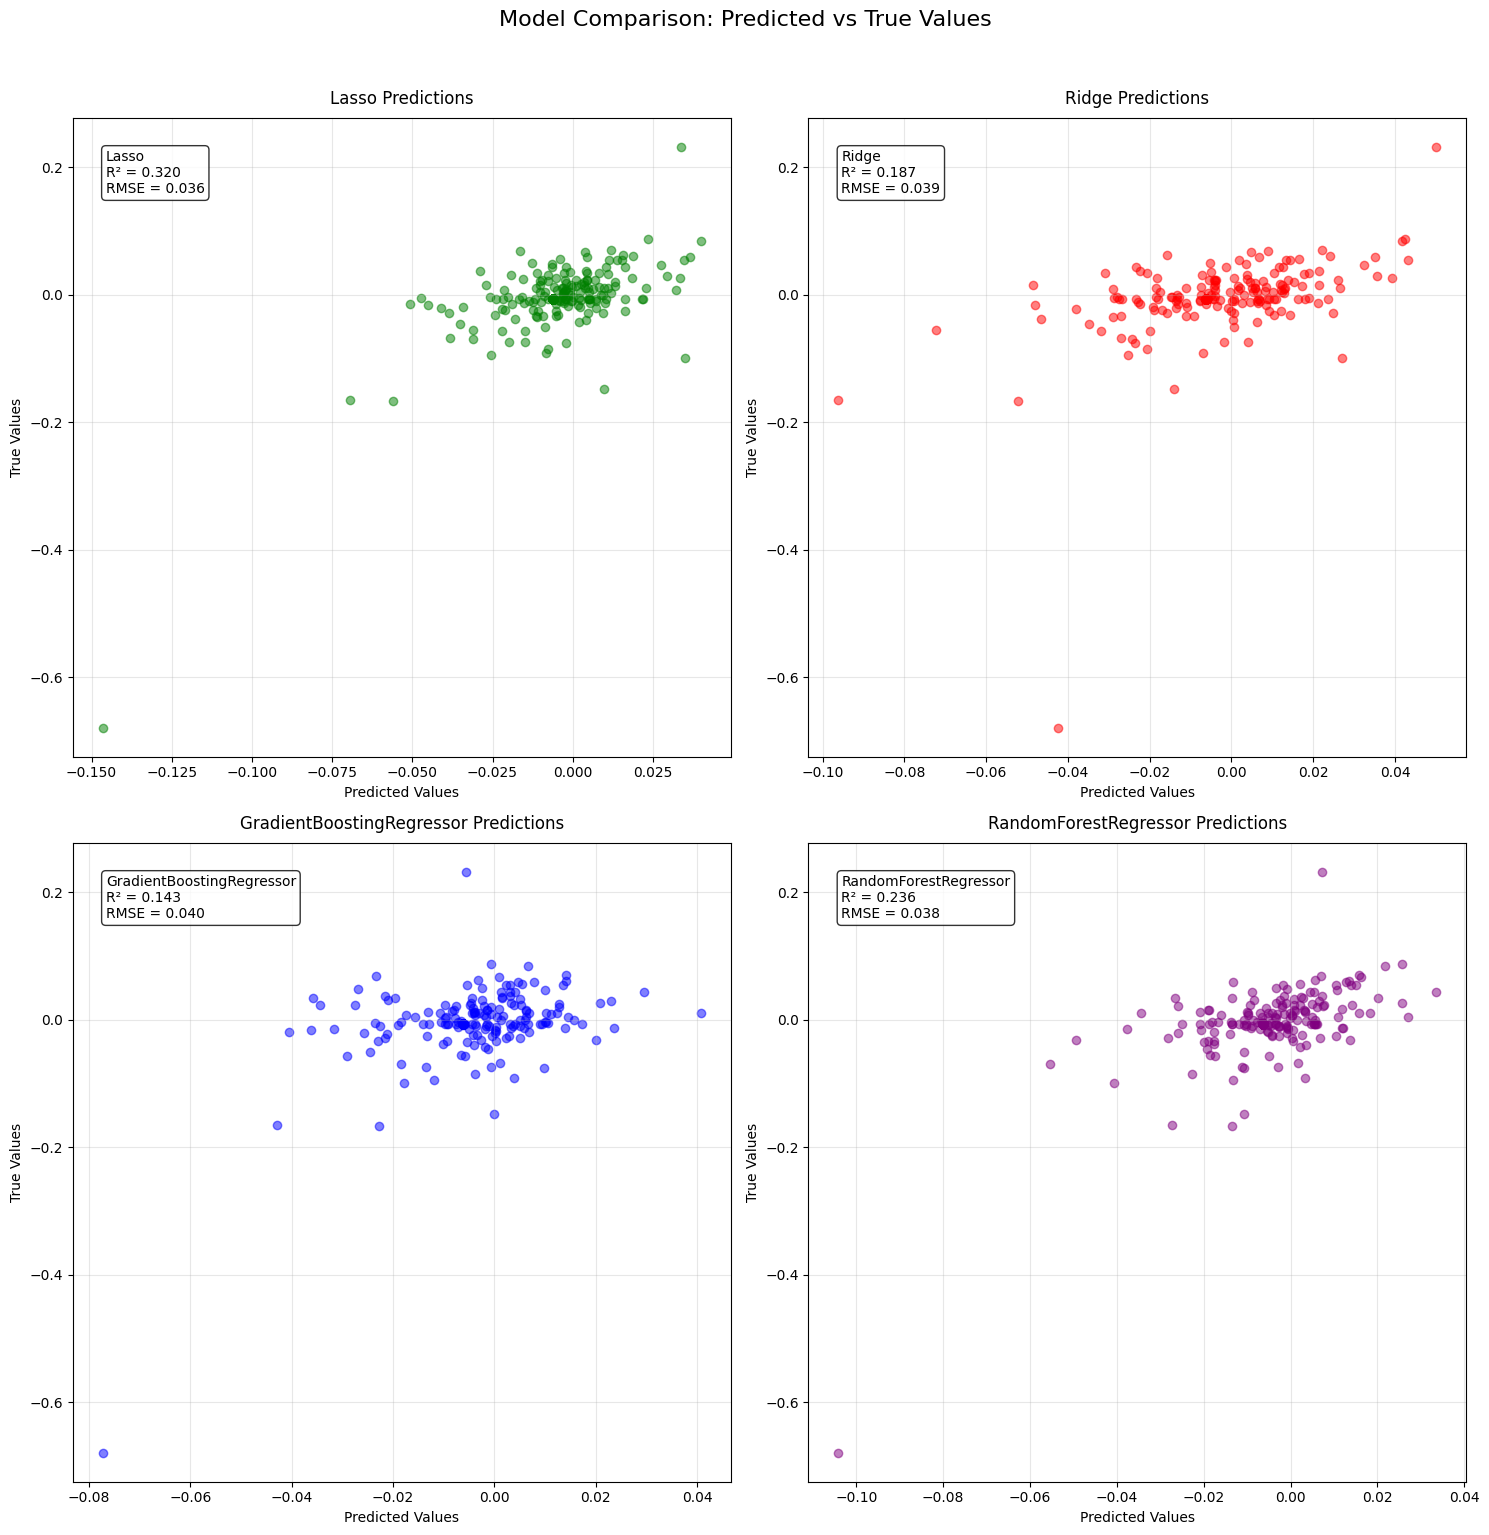

In [23]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.0993e-04 - val_mse: 6.0993e-04
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7487e-04 - mse: 5.7487e-04 - val_loss: 7.1833e-04 - val_mse: 7.1833e-04
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6025e-04 - mse: 3.6025e-04 - val_loss: 6.5280e-04 - val_mse: 6.5280e-04
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4505e-04 - mse: 5.4505e-04 - val_loss: 7.3898e-04 - val_mse: 7.3898e-04
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0423e-04 - mse: 3.0423e-04 - val_loss: 6.0518e-04 - val_mse: 6.0518e-04
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9256e-04 - mse: 1.9256e-04 - val_loss: 5.7851e-04 - val_mse: 5.7851e-04
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5336e-04 - mse: 2.5336e-04 - val_loss: 6.2536e-04 - val_mse: 6.2536e-04
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0816e-04 - mse: 1.0816e-

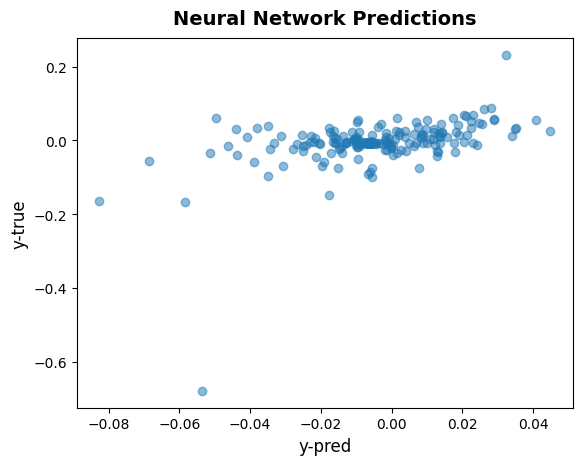

In [24]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()